# Data-Driven Approach

<img src = "picture/manhattan_dist.PNG", align = "right">

## Distance metrics

- amount of dissimilarity between 2 data

### 1. Manhattan distance
- 뉴욕의 택시가 출잘비에서 도착지로 갈 때 빌딩을 피해 동, 서, 남, 북의 격자 모양의 도로를 직선으로 갈 때의 거리<br/><br/>
- 즉 물리적인 거리의 개념으로 자동차가 아무리 마음이 급하다고 길과 길 사이에 있는 빌딩을 뚫고 대각선으로 지나갈 수 없는 노릇이다. 따라서 이러한 장애물들을 고려한 거리를 계산해서 최단 route를 찾아야 한다. <br/><br/>
- 이러한 데이터를 분석할 경우 manhattan distance를 사용한다.<br/><br/>
$$ d_m(x,y) = \sum_{j=1}^{m} |x_j - y_j| $$

<br/><br/>
<br/>

### 2. Euclidean Distance
<img src = "picture/euclidean_dist.PNG",align = "right">

- 두 점을 잇는 가장 짧은 직선 거리<br/><br/>
- 예를 들어, 헬리콥터를 타고 x지점에서 y지점으로 날아간다고 했을 때, x와 y지점에 아무리 많은 방해물(빌딩)이 있도러도 상관없이 최단 직선코스로 날아갈 수 있다고 생각하면 된다. <br/><br/>
- m차원 유클리디안 공간(Euclidian space $ R^m $)에서 두점 a(x1,y1),b(x2,y2)의 직선 거리는 피트고라스 정리에 의해서 아래 그림에서 제시한 공식으로 구할 수 있다.<br/><br/>
$$ d_E(a,b) = \sqrt{|x_1-x_2|^2 + |y_1-y_2|^2} $$


## K-Nearest Neighbors
<img src="picture/knn1.png">
- knn은 기본적으로 새로 들어오는 데이터 별이 있을 때 별은 네모 그룹의 데이터와 가장 가까우니 별은 네모그룹이라고 분류하는 알고리즘이다. 
- 여기서 k는 몇번째로 가까운 데이터까지 살펴봐서 분류를 할 것인가를 나타내는 파라미터이다.
### 원리
아래와 같이 6개의 데이터 A-F가 주어져 있고, 새로운 데이터 N이 주어졌다고 가정하여 보자
<img src = "picture/knn2.png">
**k=1**인 경우,<br/>
거리가 첫번째로 가까운 데이터 C만 보고 신규 데이터를 분류한다. 따라서 N은 C와 같은 그룹인 동그라미로 분류된다.<br/><br/>
**k=3**인 경우,<br/>
거리가 3번째로 가까운 C,D,E까지 보고 신규 데이터를 분류한다. 이때 그룹이 여러개가 나오면 다수결의 원칙을 따른다.
여기서는 1:2가 되어 N은 세모 그룹으로 분류된다. <br/><br/>
**k=5**인 경우, <br/>
거리가 5번째로 가까운 C,D,E,B,A까지 보고 신규 데이터를 분류한다. 여기서는 3:2가 되어 N은 동그라미 그룹으로 분류된다.<br/><br/>
이처럼 같은 데이터임에도 k가 얼마냐에 따라 N이 동그라미로 분류되기도 하고, 세모로 분류되기도 한다.
<br/>
적절한 파라미터인 k를 설정해 주는 것은 grid search, random search등 다양한 방법을 이용해서 찾을 수 있다.<br/><br/>
[출처](http://kkokkilkon.tistory.com/14)



### 특징
- 장점 : 구현이 쉽다, 수치 기반 데이터 분류 작업에서 성능이 좋다 <br/><br/>
- 단점 : 데이터의 양이 많으면 분류 속도가 느려진다. feature가 많으면 계산량이 많아진다. 

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from numpy.random import RandomState
from numpy import nonzero

In [9]:
from tools import rmse_cal,mae_cal,cor_cal,mean_cal,frange,\
                    accuracy,precision,recall,aupr,f1_score,make_binary
from validation import classification_cv,regression_cv,external_val_reg,\
                        external_val_classif, test_preprocessing, \
                        draw_roc,cal_external_auc

In [5]:
dataset=pd.read_table('data/breast_cancer_svc.tsv',sep='\t')

In [6]:
input_data=dataset.iloc[:,1:].transpose()
X_data=input_data.iloc[:,:-1].values
y_data=input_data.iloc[:,-1]
y_data=make_binary('normal','cancer',y_data)

In [7]:
knn = KNeighborsClassifier(weights='uniform',algorithm='auto',leaf_size=30,p=2,metric='minkowski')
#weight = 예측에 사용하는 weight function (모든 데이터 포인트에 대해 동일하게 weight를 줄경우 - uniform)
#algorithm : nearest neighbor를 구하는데 사용할 알고리즘( ball_tree, kd_tree, brute등 다양하게 있고, auto로 설정하면 알아서 골라준다)
#leaf_size : ball tree나 kdTree algorithm사용시 전달되는 leaf size
# p = distance metric으로 minkowski를 사용하는데 p=1인 경우 manhattan distance를 사용하는 것과 동일하게 되고, 
    #p=2인 경우 euclidean distance를 사용하는 것과 동일하게 되고, 그 외 임의의 값은 minkowski distance를 사용함을 의미한다.

In [10]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

def cal_auc(inputdf,model,testratio):
    #preprocessing for ROC curve

    input_data=inputdf.iloc[:,1:].transpose()
    X_data=input_data.iloc[:,:-1].values
    y_data=input_data.iloc[:,-1]
    y_data=make_binary('normal','cancer',y_data)

    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=testratio
                                                    ,random_state=RandomState(None))
    model.fit(X_train,y_train)
    
    #각 sample들을 분류하기 위한 decision을 내리는 함수
    y_score = model.fit(X_train, y_train).predict(X_test)
    fpr,tpr,threshold = roc_curve(y_test,y_score,pos_label=1)
    roc_auc=auc(fpr,tpr)
    Aupr = aupr(y_test,y_score)
    
    return y_score,fpr,tpr,threshold,roc_auc

## Find best hyperparameter
### Grid search
- 내가 값을 설정해놓고 모든 값에 대한 경우의 수를 조사해본 다음 가장 좋은 hyperparameter를 설정하는 방법<br/>

### Random search
- hyperparameter의 일정범위 안에서 random하게 hyperparameter를 sampling하여 가장 좋은 방법을 선택하는 방법
- grid search방법에 비해 일반적으로 global optimum을 더 잘 찾을 수 있다고 알려져 있다. <br/><br/>
<img src='picture/search.png'>

Grid search

In [17]:
kf = KFold(n_splits=10, shuffle=True)
parameters={'n_neighbors':[3,5,10,15,20,25]}
clf=GridSearchCV(knn,parameters,cv=kf,n_jobs=20)

In [18]:
clf.fit(X_data,y_data)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=20,
       param_grid={'n_neighbors': [3, 5, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [19]:
neighbor_gs=clf.best_params_['n_neighbors']
neighbor_gs

10

Random search

In [20]:
parameters={'n_neighbors':range(0,50)}
rsc = RandomizedSearchCV(knn,n_jobs=10,param_distributions=parameters)

In [21]:
rsc.fit(X_data,y_data)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=10, n_jobs=10,
          param_distributions={'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [22]:
neighbor_rsc = rsc.best_params_['n_neighbors']
neighbor_rsc

46

modified model using best parameter

In [23]:
fitted_knn_grid = KNeighborsClassifier(p=1,n_neighbors=neighbor_gs)
fitted_knn_rand = KNeighborsClassifier(p=1,n_neighbors=neighbor_rsc)

10-fold cross validation

In [24]:
print('grid search\n')
cv_test1=classification_cv(10,fitted_knn_grid,dataset)
print('\nrandom search\n')
cv_test1=classification_cv(10,fitted_knn_rand,dataset)

grid search

accuracy : 0.914974619289
precision :0.526315789474
recall : 0.694444444444
f1_score : 0.59880239521

random search

accuracy : 0.912436548223
precision :0.536842105263
recall : 0.671052631579
f1_score : 0.59649122807


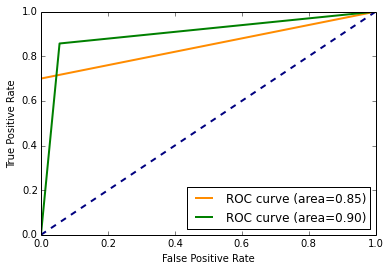

In [25]:
plt.figure()
lw=2
y_score, fpr,tpr,threshold ,roc_auc= cal_auc(dataset,fitted_knn_grid,0.1)
y_score2, fpr2, tpr2, threshold2, roc_auc2 = cal_auc(dataset,fitted_knn_rand,0.1)
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC curve (area=%0.2f)' % roc_auc)
plt.plot(fpr2,tpr2,color='green',lw=lw,label='ROC curve (area=%0.2f)' % roc_auc2)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

External validation

In [38]:
testset=pd.read_table('data/breast_cancer_test.tsv',sep='\t')

In [39]:
tmp=test_preprocessing(testset,dataset)
X_test=tmp.iloc[1:,:-1].values

In [40]:
print('grid search\n')
test_result1=external_val_classif(testset,dataset,fitted_knn_grid)
print('\nrandom search\n')
test_result2=external_val_classif(testset,dataset,fitted_knn_rand)

grid search

accuracy : 0.819444444444
precision :0.3
recall : 0.333333333333
f1_score : 0.315789473684

random search

accuracy : 0.819444444444
precision :0.3
recall : 0.333333333333
f1_score : 0.315789473684


## Regression
- k-nearest neighbor은 classification problem이 아니라 regression problem으로도 적용될 수 있다. 이때 각 포인트에 대한 label은 그 포인트의 nearest neighbor들의 평균으로 결정된다.<br/><br/>
- sklearn에서는 두가지 knn을 기반으로 한 regressor를 제공한다.<br/>
1) 첫번째는 **KNeighborsRegressor**이다. 이 방법은 각 query point에 대한 k개의 가까운 지점들을 구하고 이들의 평균을 해당 query point의 label로 예측한다.<br/>
2) 두번째는 **RediusNeighborsRegressor**이다. 이 방법은 query point를 기준으로 반지름 r안에 있는 neighbor들을 기준으로 해당 query point의 label을 예측하는 방법이다.

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
dataset=pd.read_table('data/blood_age_selected_lasso.tsv',sep='\t')

In [46]:
X_data = input_data.iloc[:,:-1]
y_data = input_data.iloc[:,-1]

In [47]:
knn = KNeighborsRegressor(p=1,n_jobs=10)

select hyperparameter

In [48]:
parameters={'n_neighbors':range(0,50)}
rsc = RandomizedSearchCV(knn,n_jobs=10,param_distributions=parameters)
rsc.fit(X_data,y_data)
neighbor_rsc = rsc.best_params_['n_neighbors']
neighbor_rsc

10

In [49]:
fitted_knn = KNeighborsRegressor(p=1,n_jobs=10,n_neighbors=neighbor_rsc)

In [50]:
cv_result=regression_cv(10,fitted_knn,dataset)

rmse : 10.3375440542
mad : 8.23109756098
cor : 0.756661292997


In [51]:
test_df=pd.read_table('data/blood_age_test.tsv',sep='\t')

In [52]:
test_result=external_val_reg(test_df,dataset,fitted_knn)

rmse = 29.401736704
mae = 27.7545454545
cor = 0.30004139226


그렇지만 regression으로써 knn은 많이 이용되지 않는 듯하다